# Homework 2
Brandon Hawkins

The goal of this homework assignment is to predict housing sale prices. We want to analyze and determine what factors contribute to higher and lower house prices and use machine learning models to get the best prediction possible.

I want to start by crediting all those who helped with this assignment. I literally could not have done it without these resources.

Tyler Folkman: https://github.com/brandonmhawkins/byu_econ_applied_machine_learning

Mr. Sivavenu: https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners

Pedro Marcelino: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

Serigne: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

Conner Leavitt ('the all knowing machine learning wizard'): Thanks for your help!

# Table of Contents

To predict the housing prices we will follow this outline:

1) Analyze our target <br>
2) Clean data <br>
3) Visualize data <br>
4) Predict results <br>

We will begin by importing the neccessary packages to do the project.

In [44]:
import pandas as pd
from pandas import get_dummies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
#don't see warnings
import warnings
warnings.filterwarnings('ignore')

Next we will import both the training and testing data sets provided by Kaggle.

In [2]:
#download data
train = pd.read_csv("/Users/brandonhawkins/Downloads/all/house_price_train.csv")
test = pd.read_csv("/Users/brandonhawkins/Downloads/all/house_price_test.csv")

## Analyze our Target

Our main variable of interest is the selling price of the home. That is what we are predicting and so we first want to look at general properties of the data collected.

In [3]:
#summary statistics
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It doesn't look like there are any extreme values so we can safely assume that these are realistic prices with a low of \$34,900 and a high of \$755,000

In [4]:
#check for missing values
train['SalePrice'].isnull().sum()

0

There are no missing values for house prices, so we have are bases covered there.

We now want to look at the distribution of the data we have collected for housing prices. This will help us understand if we want to manipulate the variable at all. If it isn't a normal distribution we can try manipulating it to a normal distribution so that it can help be more predictive in a linear model.

Text(0.5,1,'Housing Sale Price distribution')

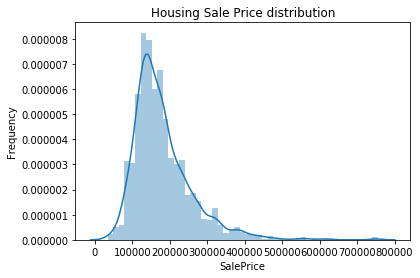

In [5]:
#plot sales price on a histogram
sns.distplot(train['SalePrice']);
plt.ylabel('Frequency')
plt.title('Housing Sale Price distribution')

The distribution does look a bit off so let's just try taking the natural log of the selling price and see if that helps.

In [6]:
#saving Sale Price Value
train["SalePrice_norm"] = train["SalePrice"]

In [7]:
#log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])

Text(0.5,1,'Logged Transformed Housing Sale Price distribution')

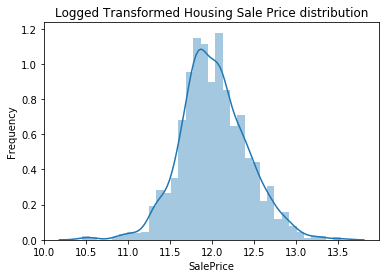

In [8]:
#plot transforemed sales price on a histogram
sns.distplot(train['SalePrice']);
plt.ylabel('Frequency')
plt.title('Logged Transformed Housing Sale Price distribution')

This looks much better. Now that we have analyzed our target variable we can move on to cleaning our data.

## Clean Data

Our objective in cleaning the data is to come up with the best data set that will predict our model. Some things that we will be looking out for are missing data and outliers.

To begin, let's just get a general idea of our data. We will look at the summary statistics of our variables, the first five rows of our training data, and the variables included in both the training and test data sets.

In [9]:
#basic summary statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_norm
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474,755000.000000


In [10]:
#top five columns of training data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_norm
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,250000


In [11]:
#variables included in training data set
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
#variables included in test data set
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Just by generally looking at this information I noticed a couple of things that could help our prediction. First I will want to drop the Id variable. I also noticed that some values are missing. This is something that we will want to take care of. 

In [13]:
#drop Id variable
train = train.drop(['Id'], axis = 1)

Now let's go ahead and see what variables are correlated with housing prices. This will help give us an idea of what will best help us predict the price.

Text(132.534,0.5,'Variables')

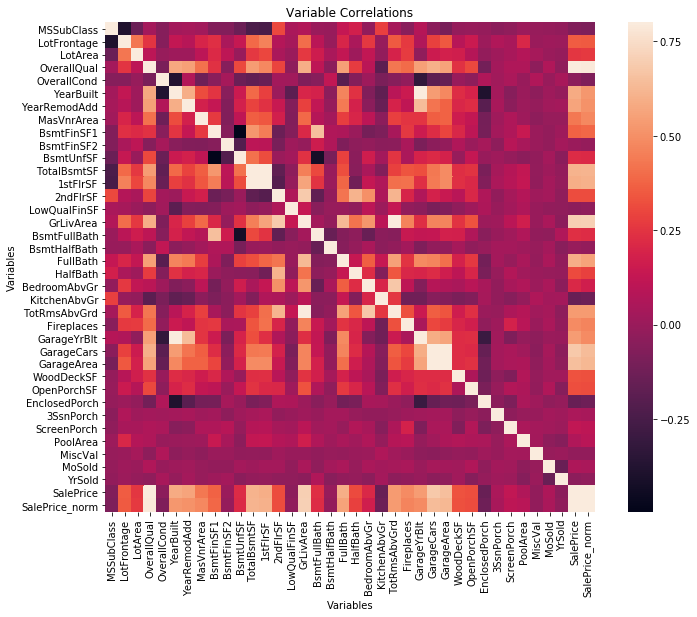

In [14]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title('Variable Correlations')
plt.xlabel('Variables')
plt.ylabel('Variables')

On this heat map we can tell which house variables are correlated with the SalePrice. We are concerned with the column on the far right, labeled SalePrice. Boxes that are a purple color aren't correlated while boxes with a white or black color have a stronger relationship. Those variables that are correlated are more important to our prediction, while those that aren't could potentially be dropped.

Knowing this information, I will go ahead and look to see what variables are missing so we can continue cleaning our data.

In [15]:
#report missing data
train.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofStyle          0
RoofMatl           0
ExterQual          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
dtype: int64

In looking at these missing variables, I noticed that the first five have many missing values. For many of them it is because the house does not have that feature and the entry was left blank. For example, houses without a pool report no value in the data set.

Upon furthur analysis of these values and the heat map, I realized that although there are many missing values that these variables have little to no relationship with sales price. That being said I am going to go ahead and drop them from the data.

In [16]:
#drop uncorrelated variables
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)

Unreported in this assignment is the tedious effort I put into filling in each of the other missing variables with the correct data entries for the missing variables. With the help of Conner, I found that using a simple formula to do this was much easier and didn't significantly alter the results. 

For all continuous values I filled in missing data with the mean and for all categorical data I filled it in with the mode. Enjoy the simplistic approach.

In [17]:
for feature in train:
  # Features with a 'dtype' of O are categorical
   if train[feature].dtype == 'O':
      train[feature] = train[feature].fillna(train[feature].mode()[0])

for feature in train:
  # Features with a 'dtype' of i or are floats are continuous
   if train[feature].dtype == np.float64 or train[feature].dtype == 'i':
      train[feature] = train[feature].fillna(train[feature].mean())

In [18]:
for feature in test:
  # Features with a 'dtype' of O are categorical
   if test[feature].dtype == 'O':
      test[feature] = test[feature].fillna(test[feature].mode()[0])

for feature in test:
  # Features with a 'dtype' of i or are floats are continuous
   if test[feature].dtype == np.float64 or test[feature].dtype == 'i':
      test[feature] = test[feature].fillna(test[feature].mean())

In [19]:
#check to make sure all missing data is taken care of
train.isnull().sum().max()

0

Now that we have taken care of all of our missing data, let's look for outliers. Outliers could potentially skew our results because they represent data that is rarely seen. To look for these, I studied the data and found three variables that correlated strongly with Sale Price and decided to plot them on a scatter plot. These three variables are above ground living room square footage, size of garage, and total basement square footage.

Text(0,0.5,'House Price')

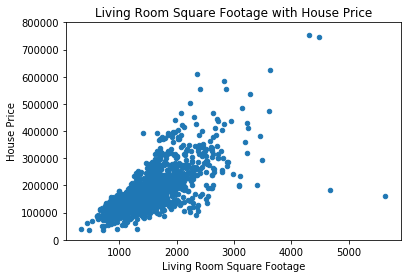

In [20]:
data = pd.concat([train['SalePrice_norm'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice_norm', ylim=(0,800000));
plt.title('Living Room Square Footage with House Price')
plt.xlabel('Living Room Square Footage')
plt.ylabel('House Price')

We can see that there are two data points above 4000 square feet of living room space that also have low house prices. We will count these as outliers and drop the data.

In [21]:
#Deleting living room outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice_norm']<300000)].index)

Text(0,0.5,'House Price')

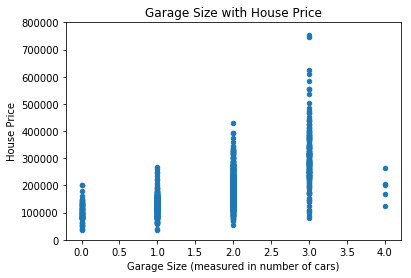

In [22]:
data = pd.concat([train['SalePrice_norm'], train['GarageCars']], axis=1)
data.plot.scatter(x='GarageCars', y='SalePrice_norm', ylim=(0,800000));
plt.title('Garage Size with House Price')
plt.xlabel('Garage Size (measured in number of cars)')
plt.ylabel('House Price')

In [23]:
train['GarageCars'].sort_values(ascending=False)[:10]

1350    4
1340    4
747     4
1190    4
420     4
199     3
554     3
1169    3
1316    3
1027    3
Name: GarageCars, dtype: int64

We can see that there are only five houses that report a four car garage and their house price does not follow the same trend of house price. We will drop these observations as well.

In [24]:
train = train.drop(train[(train['GarageCars']==4)].index)

Text(0,0.5,'House Price')

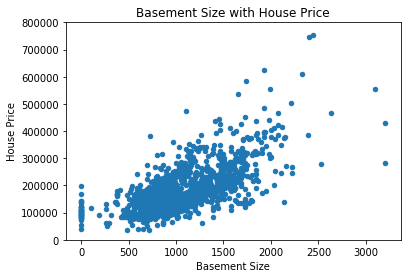

In [25]:
data = pd.concat([train['SalePrice_norm'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice_norm', ylim=(0,800000));
plt.title('Basement Size with House Price')
plt.xlabel('Basement Size')
plt.ylabel('House Price')

In looking at how basement sqare footage compares to house selling price we can see one outlier above 6000 square feet so we will remove that as well.

In [26]:
train = train.drop(train[(train['TotalBsmtSF']>6000)].index)

In [27]:
#remove SalePrice_norm (unlogged SalePrice variable)
train = train.drop(['SalePrice_norm'], axis = 1)


## Visualize Data

Now that we have taken care of our outliers and fixed our missing data we will go ahead and visualize the data so we can see it better. 

Text(69,0.5,'Highest Correlated Variables with Sale Price')

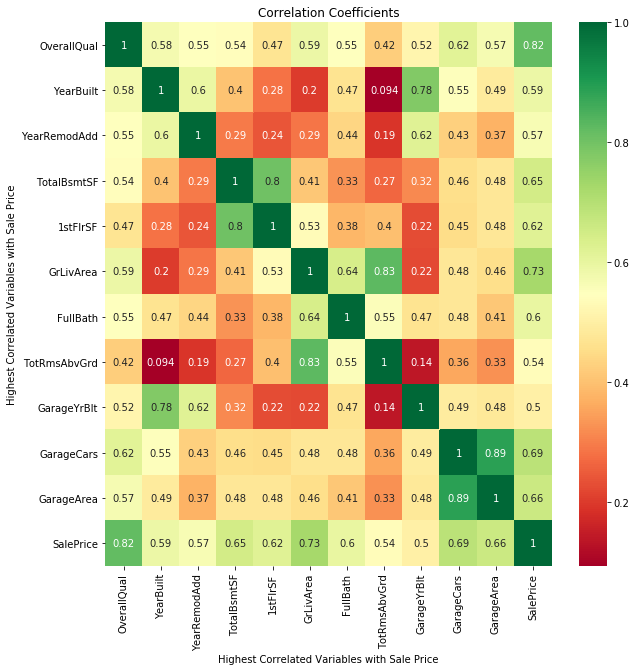

In [28]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title('Correlation Coefficients')
plt.xlabel('Highest Correlated Variables with Sale Price')
plt.ylabel('Highest Correlated Variables with Sale Price')

This map helps us to see which variables are most correlated with house prices. A higher number in the far right columb means that that variable has a stronger relationship with house prices.

After cleaning and visualizing our data we need to create dummy variables and scale our data before predicting our results.

In [29]:
#turn categorical data into dummy variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [30]:
#Scale data
scaler = StandardScaler()
scaler.fit(train)
scaled_df = scaler.transform(train)

We will now need to make sure that both our training and testing data sets are the same size in order to prepare them for making predictions.

In [31]:
#identify target
target = train.SalePrice

In [32]:
#remember test ID
test_Id = test.Id

In [33]:
#identify different training and test variables
missing_train = train.columns.difference(test.columns)

In [34]:
#drop differences
train = train.drop(missing_train, axis=1)

In [35]:
#identify different training and test variables
missing_test = test.columns.difference(train.columns)

In [36]:
#drop differences
test = test.drop(missing_test, axis=1)

## Predict Results

Now that we understand and have tidied up the data we will use three basic models to predict housing prices. We will use a general linear regression, an Elastic-net regression, and K-nearest-neighbors.

We will split our training data set into a training and test set to give us a good idea of how our model is doing.

In [37]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.20, random_state=42)

Here we will run our data through a basic linear regression without constraints to see how well it does.

In [38]:
#basic linear regression
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)
print("Train MSE: {}".format(np.sqrt(mean_squared_error(y_train, train_predictions))))
print("Test MSE: {}".format(np.sqrt(mean_squared_error(y_test, test_predictions))))

Train MSE: 29.595099826697027
Test MSE: 9.478234643552483


Our goal is to minimize our mean squared error so let's see if we can use another model to get it down lower.

In [39]:
#Elastic-net regression
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.00261605688157
Test MSE: 0.002697158685263284


Here we used an Elastic-net regression. We added constraints to our model to restrict our variable coefficients. It performed significantly better with a much lower MSE. 

To determine our hyperparameters for the model we used cross-validation to help us select the best option. We will use cross-validation for K-nearest-neighbors as well.

Let's go ahead and try K-nearest-neighbors and see how it does. Here we will group together data points that are closest to each other and make predictions based on this model.

In [40]:
#K-nearest neighbors
reg = KNeighborsRegressor()
neigh_gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
neigh_gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(neigh_gridsearch.best_params_))
y_pred_train = neigh_gridsearch.predict(X_train)
y_pred_test = neigh_gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Train MSE: 0.0	Test MSE: 0.032706561112956625


It looks like our Elasic-net regression had the lowest MSE and is the winner. We will use this data set to submit our results to Kaggle.

In [41]:
#save model
Elastic_model = clf.fit(train, target)

In [42]:
#predict results
Final = np.exp(Elastic_model.predict(test))

In [43]:
#save results to csv to upload
pd.DataFrame({'ID': test_Id, 'SalePrice': Final}).to_csv('HousingPricePrediction.csv', index=False)

I have now uploaded my results to Kaggle and am sitting at 2274th place. Not very good, but the miracle is that I made it through this project alive. I learned a lot and know what I would do differently next time. I am not super confident in the results because I believe that if I had more time I would look at using different models and try to reduce the MSE even furthur. I would want to do more work if I were to submit my model to be used by a company. I would like to explore the data more and look into alternative models. Thanks!